In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("Tensorflow version: {}".format(tf.__version__))

# dataset
X_train = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]  # input of XOR
y_train = [[0.], [1.], [1.], [0.]]  # result of XOR

Tensorflow version: 2.0.0


In [4]:
# class definition
class multipleLayerXOR(object):
    '''
    Make a neural network with 3 perceptrons,
    and fit the model with gradient descendent
    '''
    def __init__(self, learning_rate=0.1):
        '''
        initialization
        '''
        self.W1 = tf.Variable(tf.random.normal([2, 2]), name='weight_1')
        self.b1 = tf.Variable(tf.random.normal([2]), name='bias_1')
        self.W2 = tf.Variable(tf.random.normal([2, 1]), name='weight_2')
        self.b2 = tf.Variable(tf.random.normal([1]), name='bias_2')
        # make Gradient descent optimizer
        self.optimizer = tf.keras.optimizers.SGD(lr=learning_rate)

    def fit(self, X, y, epochs=500):
        '''
        optimize parameters using the cost
        epoch : learning count
        return value: list of costs
        '''
        cost = []
        for i in range(epochs):
            with tf.GradientTape() as tape:
                result_layer1 = tf.sigmoid(tf.matmul(X, self.W1) + self.b1)
                prediction = tf.sigmoid(tf.matmul(result_layer1, self.W2) + self.b2)
                curCost = -tf.reduce_mean(y * tf.math.log(prediction) +
                                          (tf.subtract([[1.], [1.], [1.], [1.]], y) * tf.math.log(1 - prediction)))
            # compute gradient
            grads = tape.gradient(curCost, [self.W1, self.b1, self.W2, self.b2])
            # find least cost by the optimizer
            self.optimizer.apply_gradients(zip(grads, [self.W1, self.b1, self.W2, self.b2]))
            cost.append(curCost)
        return cost

    def predict(self, X):
        '''
        Based on the fitted model, return predicted result of input parameter.
        return value: predicted result
        '''
        return tf.sigmoid(tf.matmul(tf.sigmoid(tf.matmul(X, self.W1) + self.b1), self.W2) + self.b2)



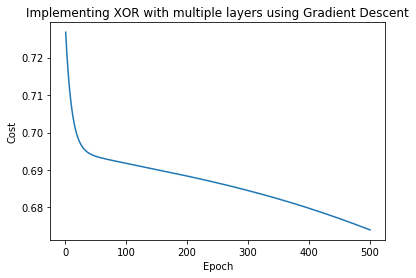

Real value :  [0.0]  Predicted value :  tf.Tensor([0.50648844], shape=(1,), dtype=float32)
Real value :  [1.0]  Predicted value :  tf.Tensor([0.53953004], shape=(1,), dtype=float32)
Real value :  [1.0]  Predicted value :  tf.Tensor([0.4636109], shape=(1,), dtype=float32)
Real value :  [0.0]  Predicted value :  tf.Tensor([0.45321083], shape=(1,), dtype=float32)


'\ninstall tensorboard by using command prompt\n-> pip install tensorboard\nafter installing, in command prompt, type\n-> tensorboard --logdir=./logs\nand copy-paste the local address to an internet browser\n'

In [7]:
# make model
model = multipleLayerXOR()
costs = model.fit(X_train, y_train)

# draw graph
plt.plot(range(1, len(costs) + 1), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title("Implementing XOR with multiple layers using Gradient Descent")
plt.show()
value_predict = model.predict(X_train)

# compare real value and predicted value
for i in range(4):
    print("Real value : ", y_train[i], " Predicted value : ", value_predict[i])